# Plot radar accumulations

This notebook plots the radar accumulations generated from the previous notebook.

In [1]:
%pylab inline

import pyart
import wradlib as wrl
import pandas as pd
import tempfile
import os
import numpy as np

import pickle

import pytz
import datetime as dt

from copy import deepcopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature

Populating the interactive namespace from numpy and matplotlib

## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\pyart\graph\cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\pyart\graph\cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
import matplotlib.gridspec as gridspec

In [3]:
reader = shpreader.Reader(r'C:\Users\irene\Documents\Work\Data\GIS\tl_2016_17_cousub\tl_2016_17_cousub.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

In [4]:
# load CCN gauge locations
CCN_gauge_locations_fname = 'C:/Users/irene/Documents/Work/Data/Cook_County/CookCounty_gage_locations.csv'
# load CCN gauge observations
CCN_gauge_observations_fname = 'C:/Users/irene/Documents/Work/Data/Cook_County/WaterYear2013.csv'

df_gauge_loc = pd.read_csv(CCN_gauge_locations_fname,header=0)
df_gauge = pd.read_csv(CCN_gauge_observations_fname,header=0)

x = df_gauge_loc['Longitude - West'].values
y = df_gauge_loc['Latitude'].values

In [5]:
# set the timezone
timezone = pytz.timezone("America/Chicago")

In [6]:
df_gauge['Datetime'] = pd.to_datetime(df_gauge['Date/Time'])
df_gauge['Datetime'] = df_gauge['Datetime'].dt.tz_localize(timezone,ambiguous='NaT',nonexistent ='NaT')

df_gauge = df_gauge.drop(labels=['Date/Time','Unnamed: 26','Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30'], axis=1)
# set the datetime index
df_gauge = df_gauge.set_index(pd.DatetimeIndex(df_gauge['Datetime']))

In [7]:
# Getting back the objects:
with open('radarparams.pkl','rb') as f:  # Python 3: open(..., 'rb')
    sitecoords, az, r = pickle.load(f)

In [9]:
projection = ccrs.PlateCarree()

In [10]:
accum_fname_list = [f for f in os.listdir('.') if f.endswith('.hdf5')]

In [11]:
tstart_fname = accum_fname_list[0].rsplit('.',1)[0].strip('.hdf5')
tstart_utc = dt.datetime.strptime(tstart_fname,'KLOT%Y%m%d_%H%M%S')
tstart_utc_aware = pytz.utc.localize(tstart_utc)
tstart_local_aware = tstart_utc_aware.astimezone(timezone)

In [12]:
# accum_total = np.zeros((720, 1832))
# for accum_fname in accum_fname_list:
#     accum_hour, attrs = wrl.io.from_hdf5(accum_fname)
#     accum_total += accum_hour

In [13]:
accum_fname = accum_fname_list[29]

# read one
accum_hour, attrs = wrl.io.from_hdf5(accum_fname)

In [14]:
fname = accum_fname.rsplit('.',1)[0].strip('.hdf5')
print(fname)
dtime_utc = dt.datetime.strptime(fname,'KLOT%Y%m%d_%H%M%S')

KLOT20130418_160000


In [15]:
dtime_utc_aware = pytz.utc.localize(dtime_utc)
dtime_local_aware = dtime_utc_aware.astimezone(timezone)

In [16]:
print(dtime_local_aware.isoformat())
print(dtime_utc_aware.isoformat())

2013-04-18T11:00:00-05:00
2013-04-18T16:00:00+00:00


In [17]:
timestr = dt.datetime.strftime(dtime_local_aware,'%Y-%m-%d %H:%M')
savefname = dt.datetime.strftime(dtime_local_aware,'%Y%m%d_%H%M%S_Central.png')

In [18]:
df_gauge_subset = df_gauge.loc[(df_gauge.Datetime >= tstart_local_aware) & (df_gauge.Datetime <= dtime_local_aware)]

In [19]:
df_gauge_subset.head()

G1   G2    G3    G4    G5    G6   G7    G8    G9  \
Datetime                                                                        
2013-04-17 06:00:00-05:00  0.00  0.0  0.00  0.00  0.00  0.00  0.0  0.00  0.00   
2013-04-17 07:00:00-05:00  0.00  0.0  0.00  0.00  0.00  0.00  0.0  0.00  0.00   
2013-04-17 08:00:00-05:00  0.00  0.0  0.00  0.00  0.00  0.00  0.0  0.00  0.00   
2013-04-17 09:00:00-05:00  0.01  0.0  0.07  0.03  0.00  0.01  0.0  0.00  0.00   
2013-04-17 10:00:00-05:00  0.00  0.0  0.07  0.14  0.01  0.04  0.0  0.05  0.02   

                            G10  ...  G17  G18  G19   G20  G21  G22  G23  G24  \
Datetime                         ...                                            
2013-04-17 06:00:00-05:00  0.00  ...  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0   
2013-04-17 07:00:00-05:00  0.00  ...  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0   
2013-04-17 08:00:00-05:00  0.00  ...  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0   
2013-04-17 09:00:00-05:00  0.01  ...  0.0  0.0  0.0  0.01  0.0  0.0  0.0  0.0   
2013-04-17 10:00:00-05:00  0.01  ...  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0   

                            G25                  Datetime  
Datetime                                                   
2013-04-17 06:00:00-05:00  0.00 2013-04-17 06:00:00-05:00  
2013-04-17 07:00:00-05:00  0.00 2013-04-17 07:00:00-05:00  
2013-04-17 08:00:00-05:00  0.00 2013-04-17 08:00:00-05:00  
2013-04-17 09:00:00-05:00  0.03 2013-04-17 09:00:00-05:00  
2013-04-17 10:00:00-05:00  0.02 2013-04-17 10:00:00-05:00  

[5 rows x 26 columns]

In [20]:
gagenum = 'G7'

In [21]:
#df_gauge_subset[gagenum]

Text(0.5, 1.0, 'Gauge measurements from G10 (mm)')

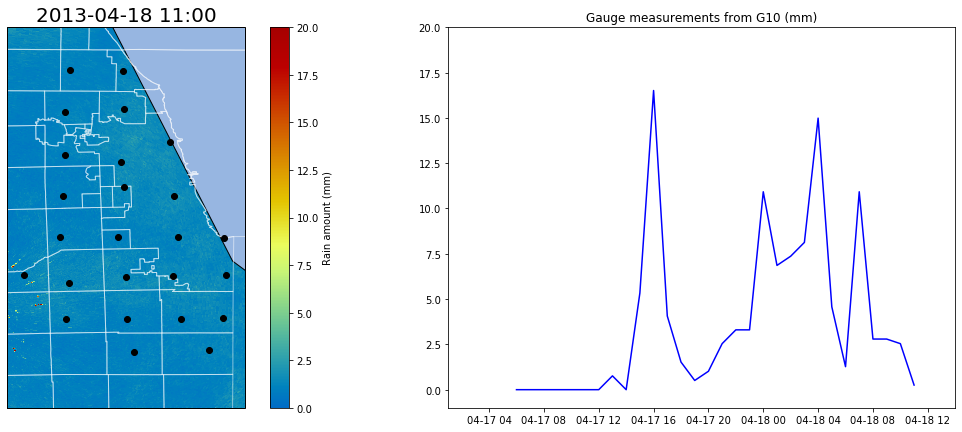

In [22]:
fig = plt.figure(figsize=[20,7])

gridspec.GridSpec(1,3)

#ax = plt.axes(projection=projection)
ax = fig.add_subplot(121,projection=projection)
ax,pm = wrl.vis.plot_ppi(accum_hour, r=r, az=az, site=sitecoords,proj=projection, vmin=0, vmax=20, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,ax=ax)
plt.xlim(-88,-87.5)
plt.ylim(41.4,42.2)
cb = plt.colorbar(pm)
cb.set_label('Rain amount (mm)')
ax.add_feature(COUNTIES, facecolor='none', edgecolor='w', alpha=0.5)
ax.add_feature(cfeature.LAKES, zorder=.5, edgecolor='k')
plt.plot(x,y,'ko')
plt.title(timestr,fontsize=20)
# plt.savefig(savefname, bbox_inches='tight')

ax2 = fig.add_subplot(122)
time = df_gauge_subset.index
gaugevals = df_gauge_subset[gagenum].values*25.4 # convert inches to mm
ax2.plot_date(time,gaugevals,'b-')
ax2.set_xlim('2013-04-17 06:00:00','2013-04-18 19:00:00')
ax2.set_ylim(-1,20)
ax2.set_title('Gauge measurements from G10 (mm)')

KLOT20130417_110000
KLOT20130417_120000
KLOT20130417_130000
KLOT20130417_140000
KLOT20130417_150000
KLOT20130417_160000
KLOT20130417_170000
KLOT20130417_180000
KLOT20130417_190000
KLOT20130417_200000
KLOT20130417_210000
KLOT20130417_220000
KLOT20130417_230000
KLOT20130418_000000
KLOT20130418_010000
KLOT20130418_020000
KLOT20130418_030000
KLOT20130418_040000
KLOT20130418_050000
KLOT20130418_060000
KLOT20130418_070000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_080000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_090000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_100000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_110000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_120000
KLOT20130418_130000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_140000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_150000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_160000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_170000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_180000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_190000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_200000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_210000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_220000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130418_230000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


KLOT20130419_000000


C:\Users\irene\Anaconda3\envs\saveurproj\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


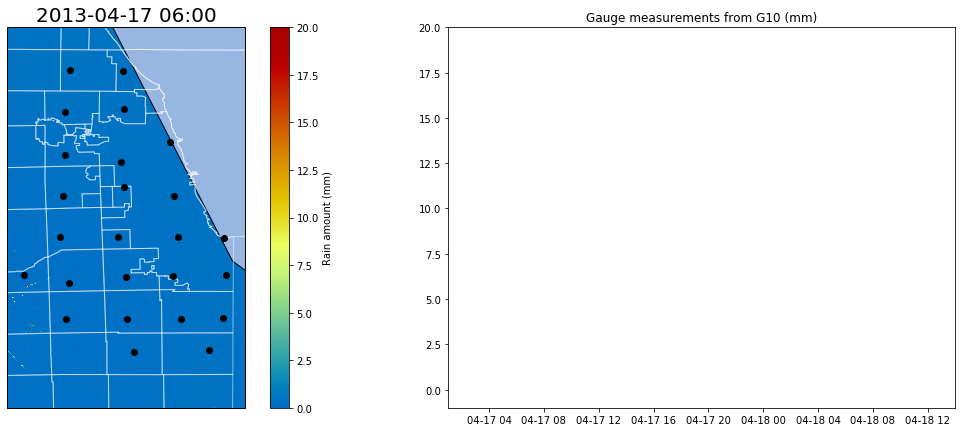

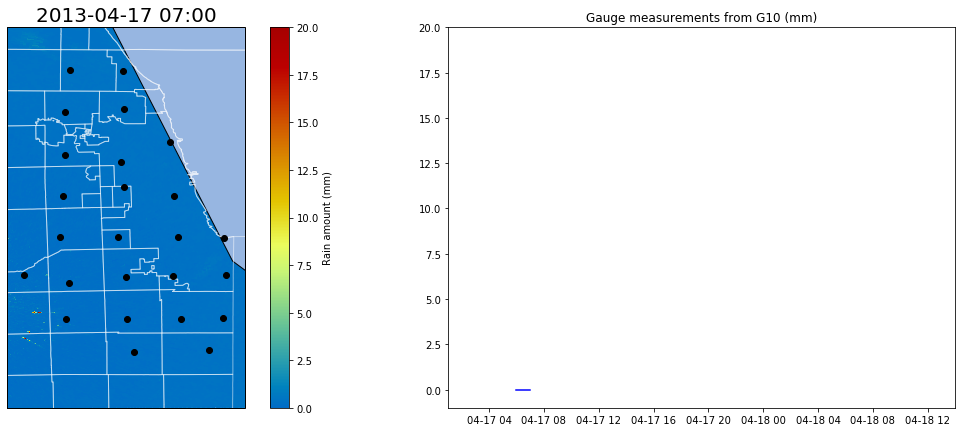

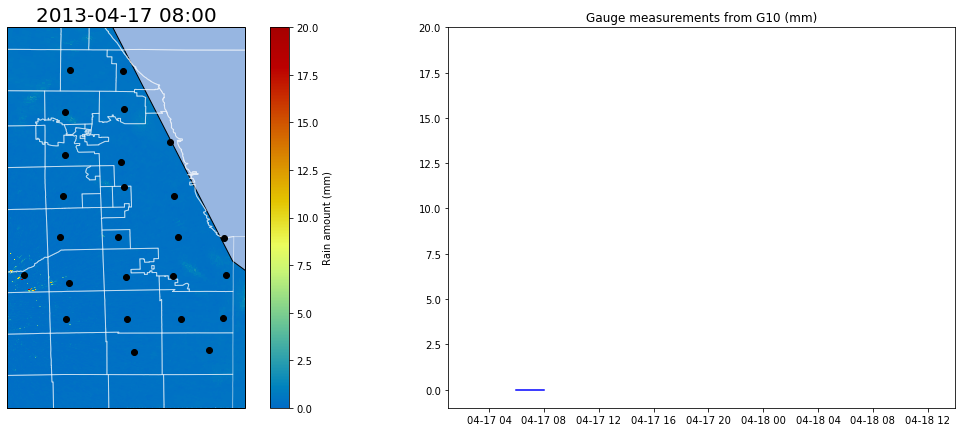

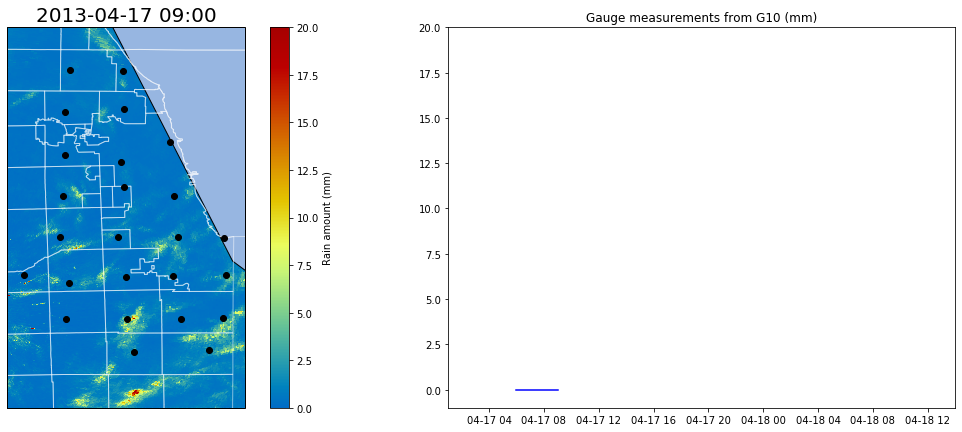

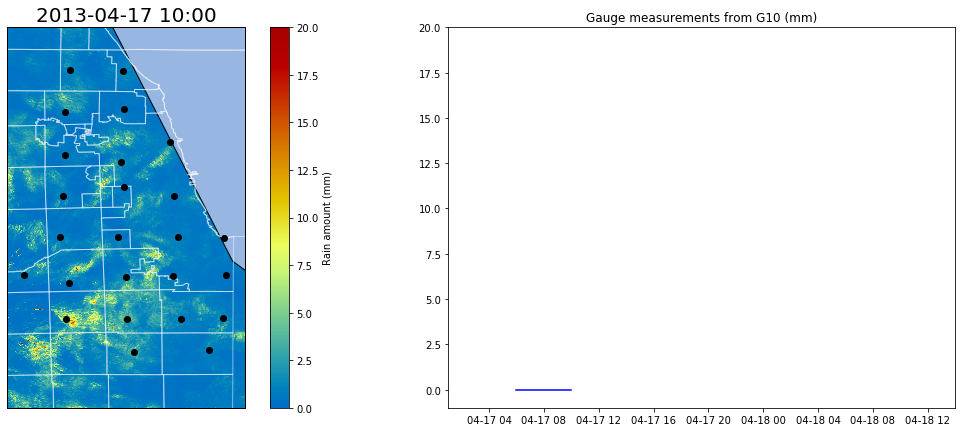

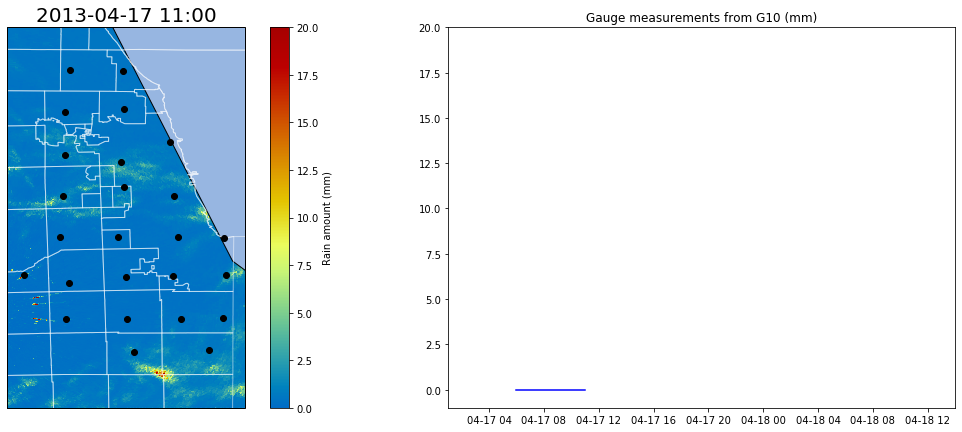

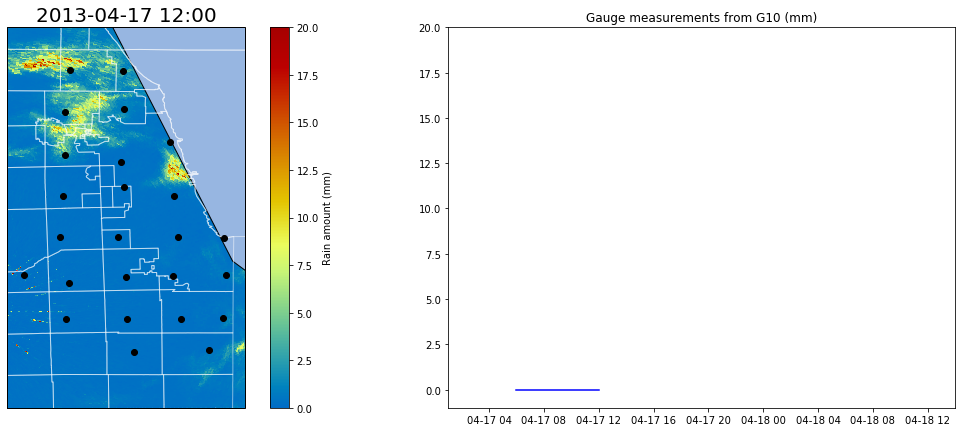

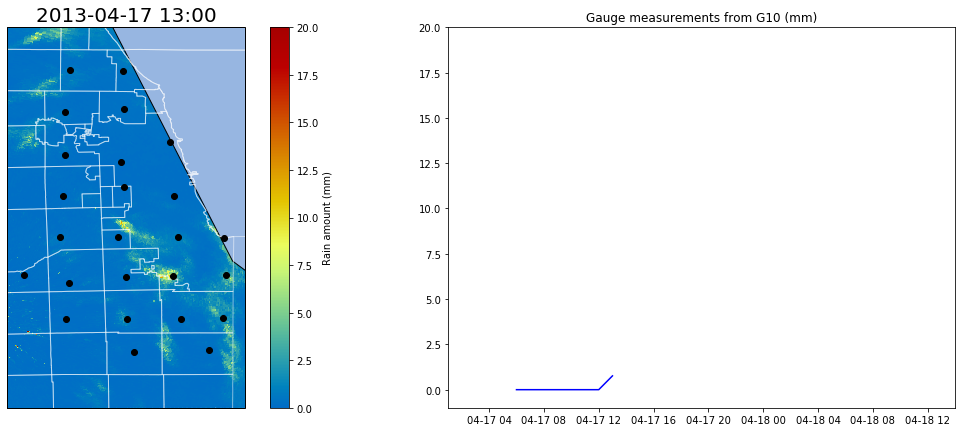

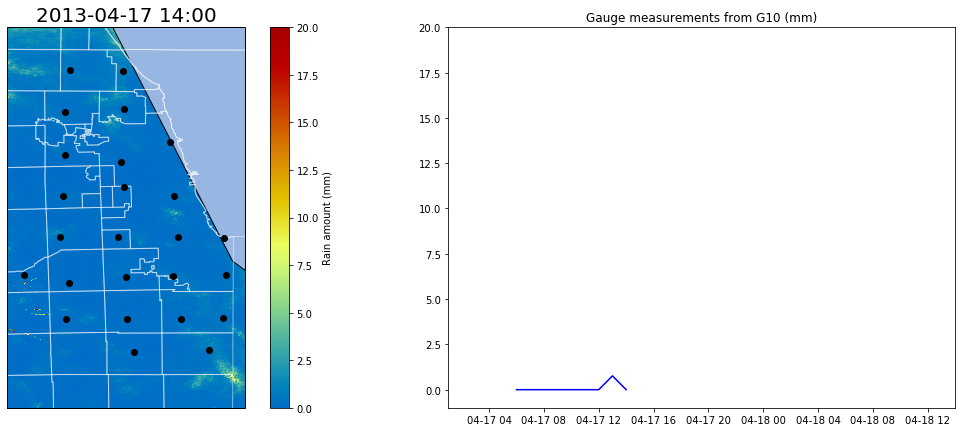

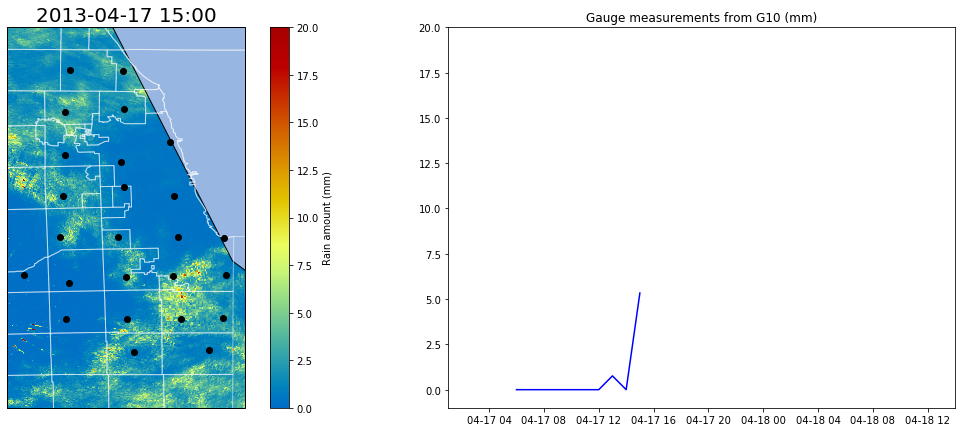

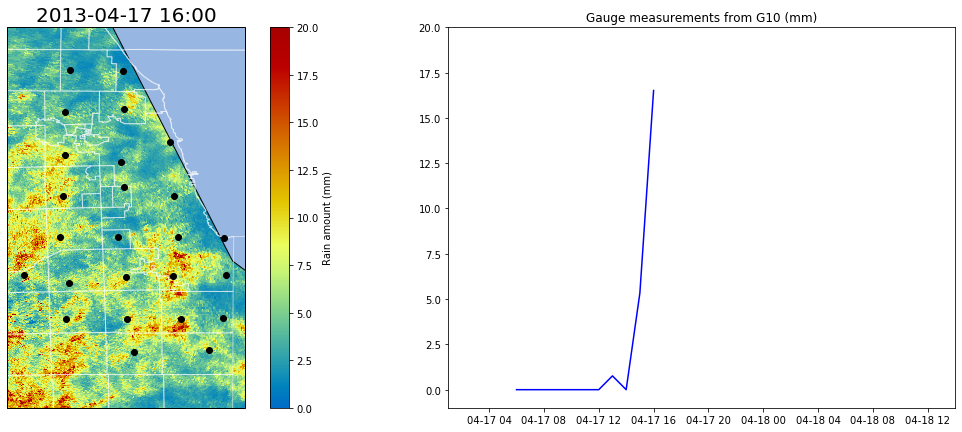

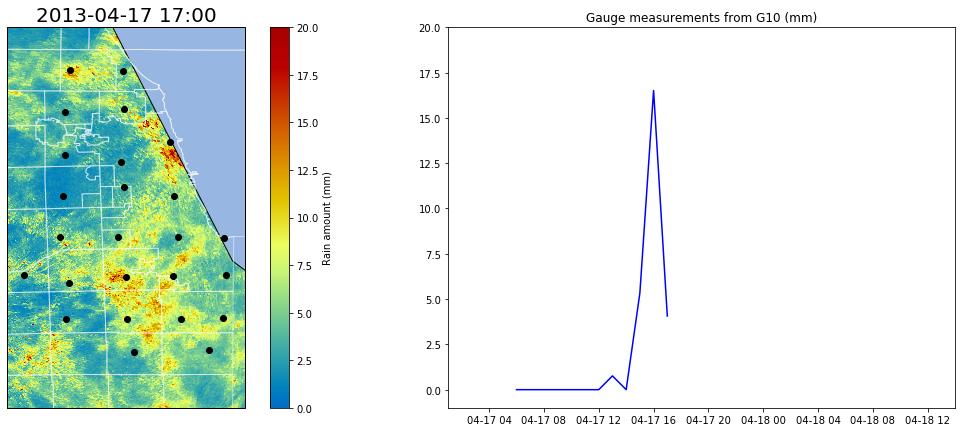

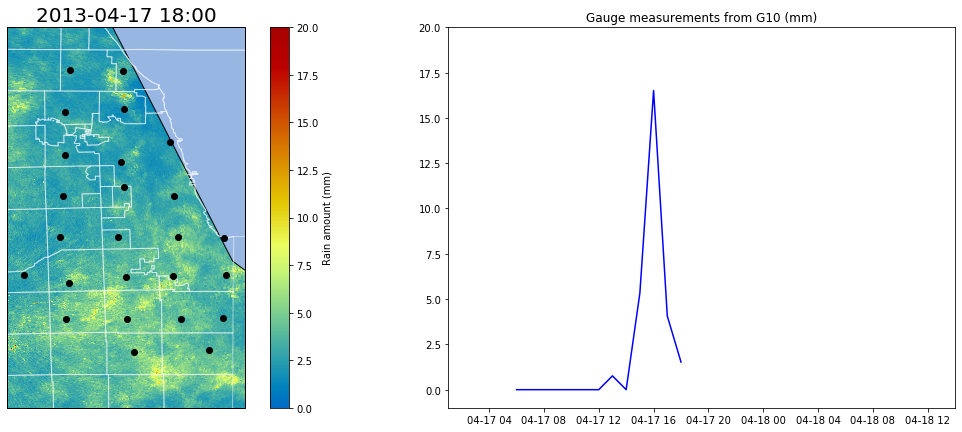

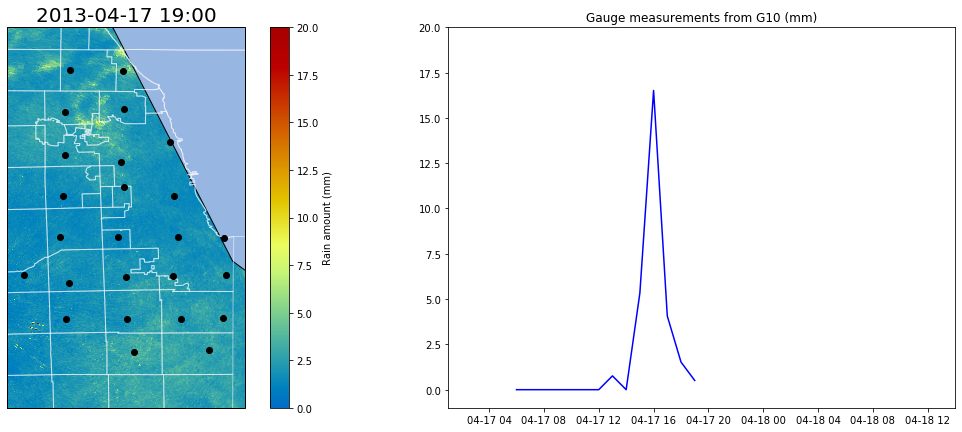

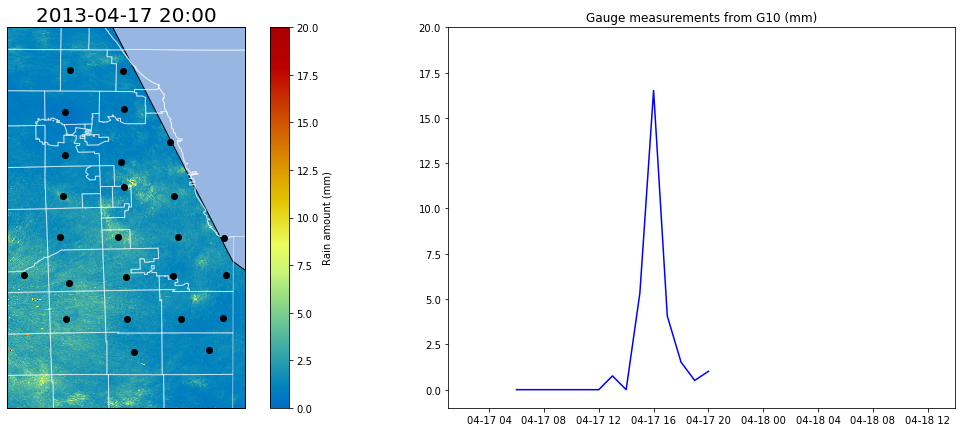

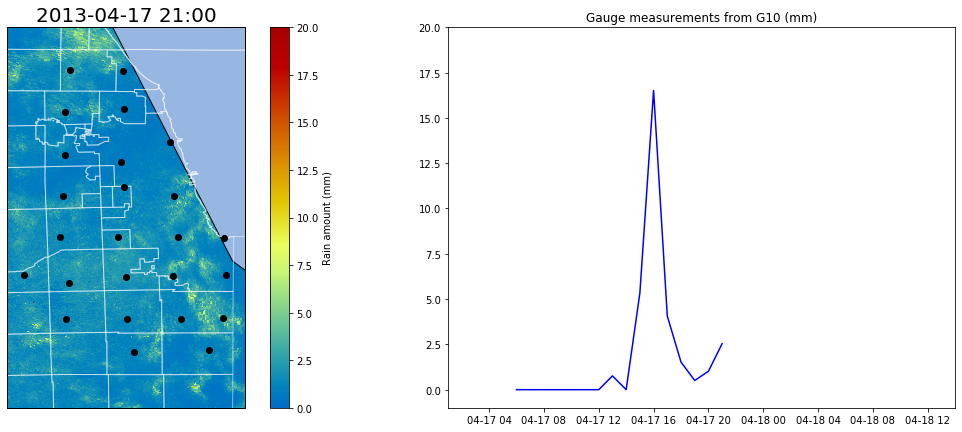

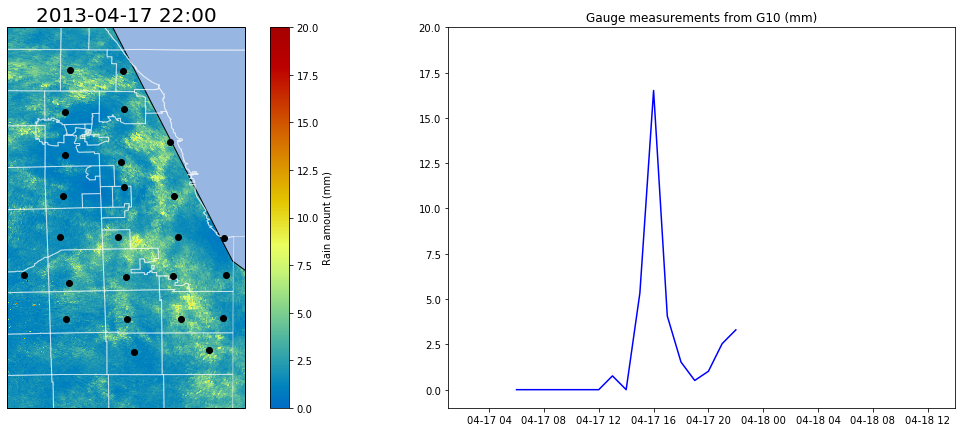

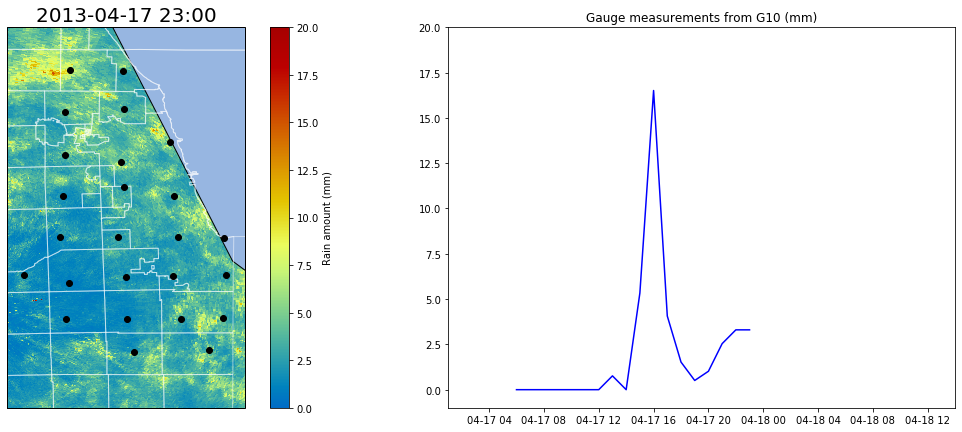

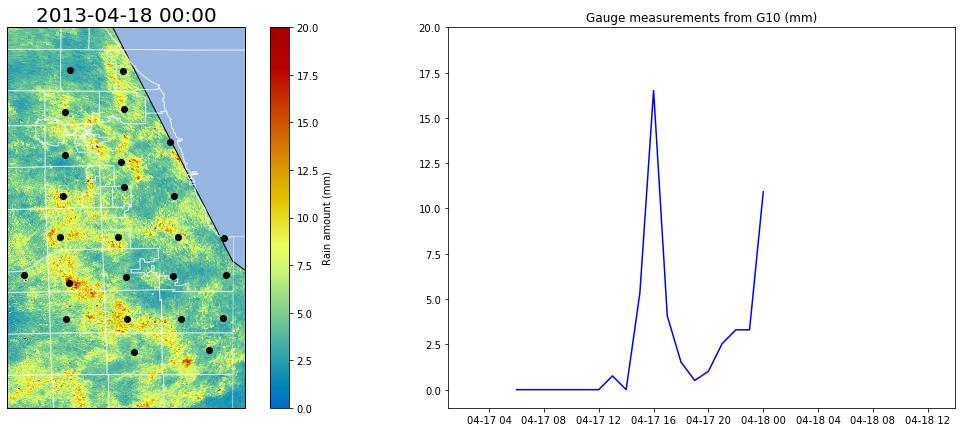

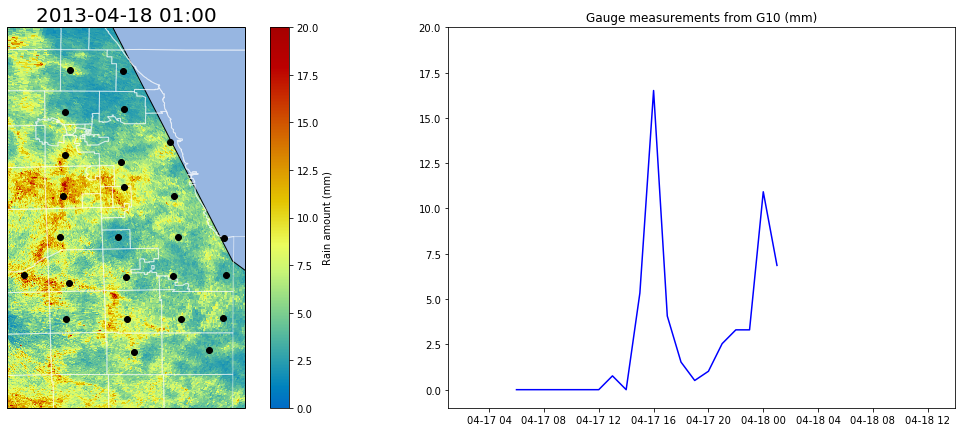

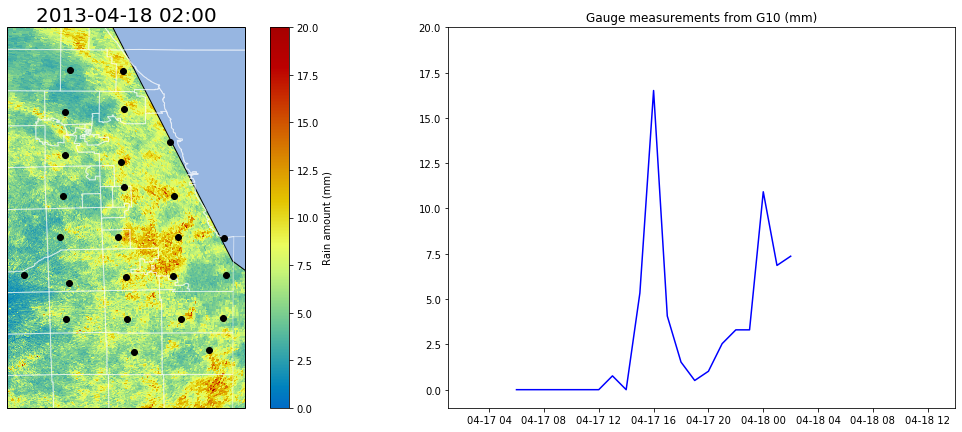

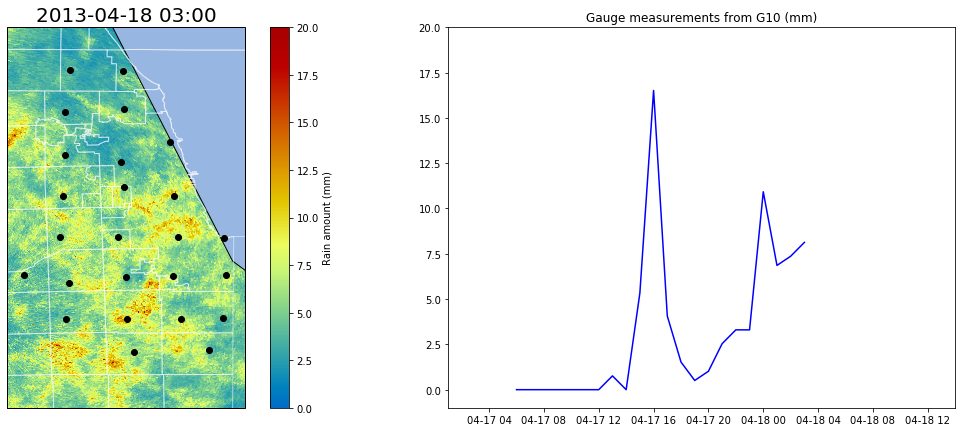

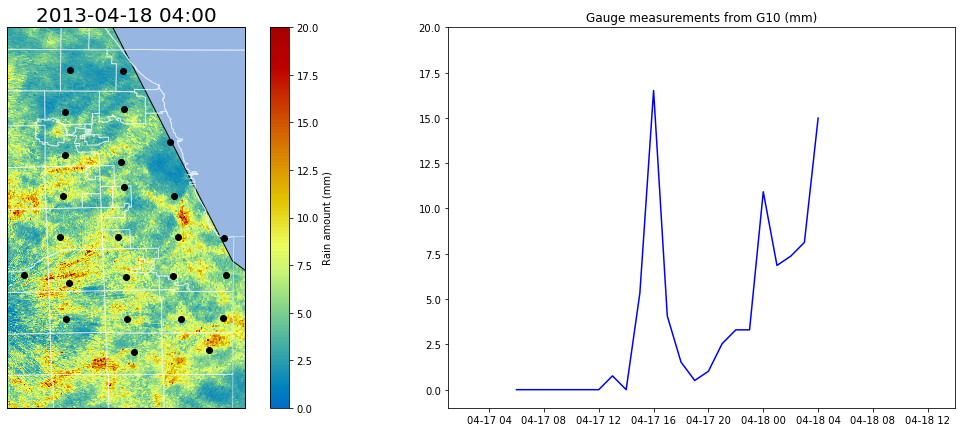

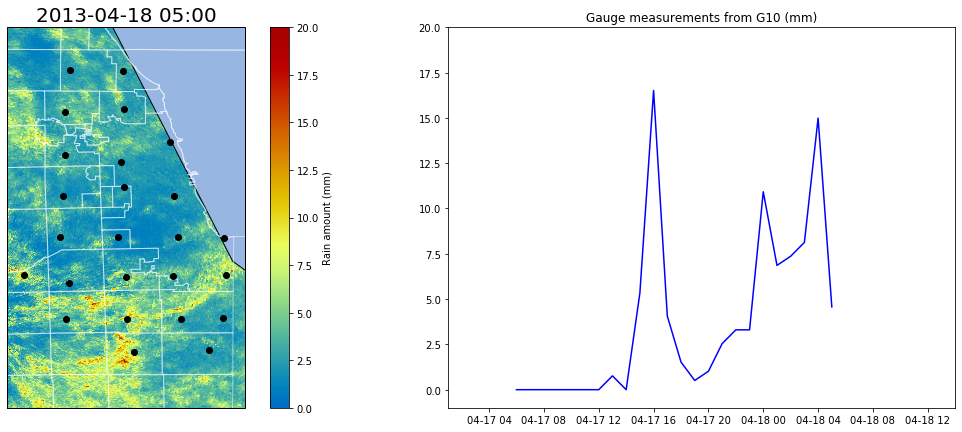

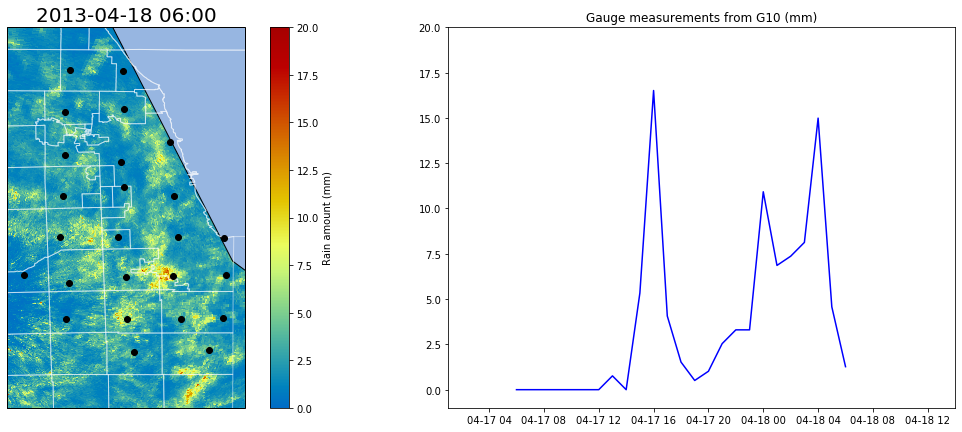

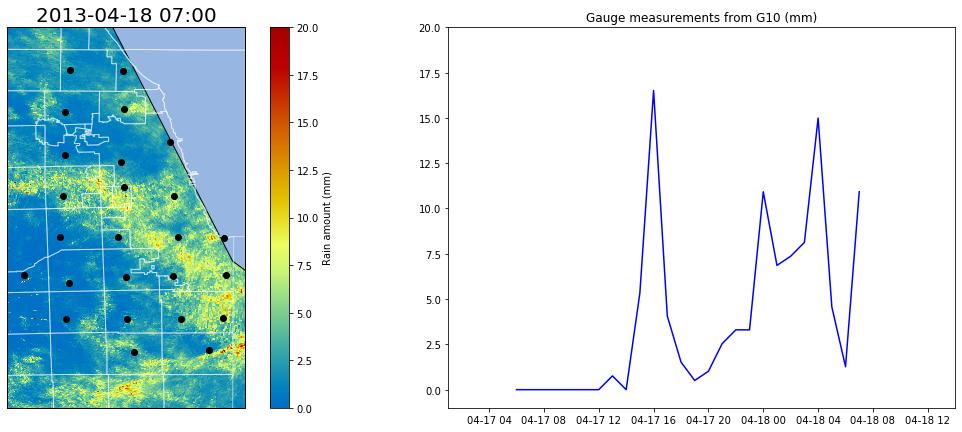

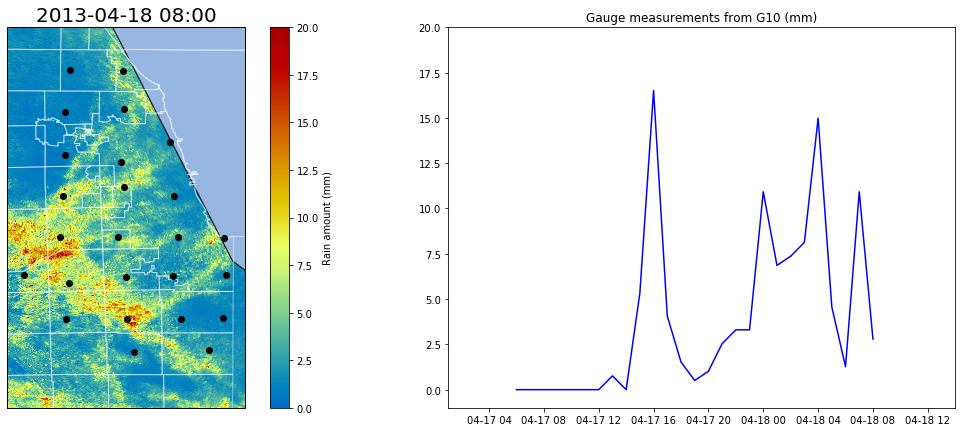

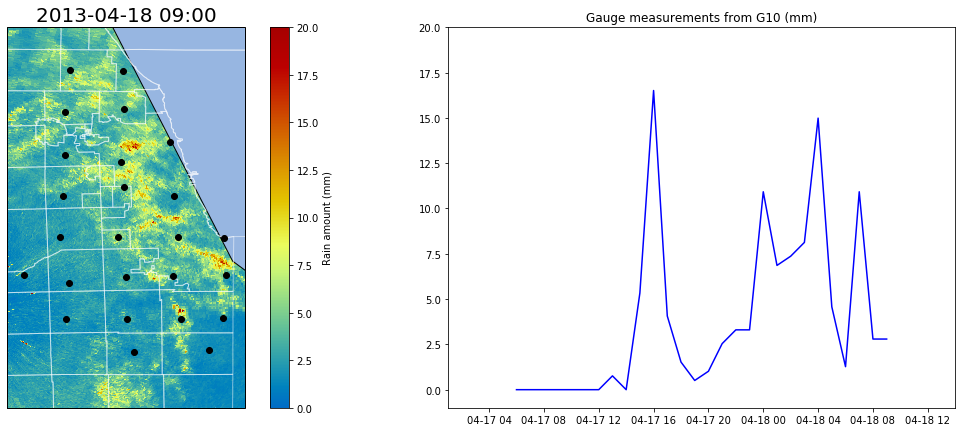

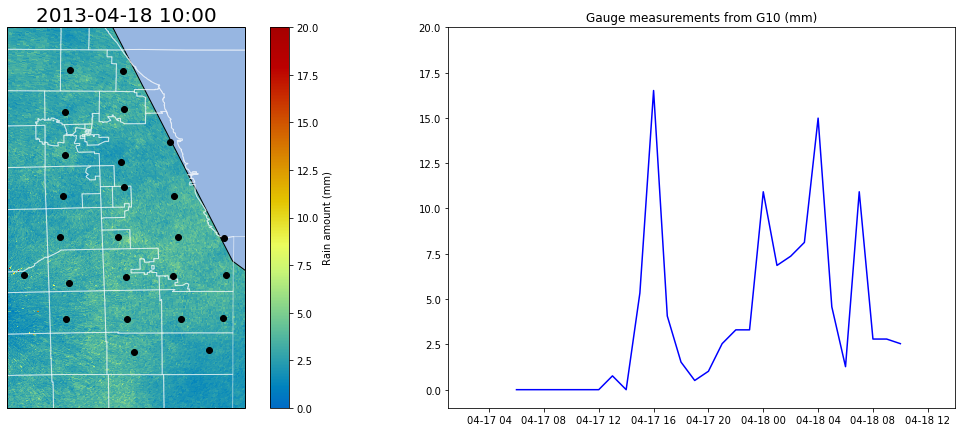

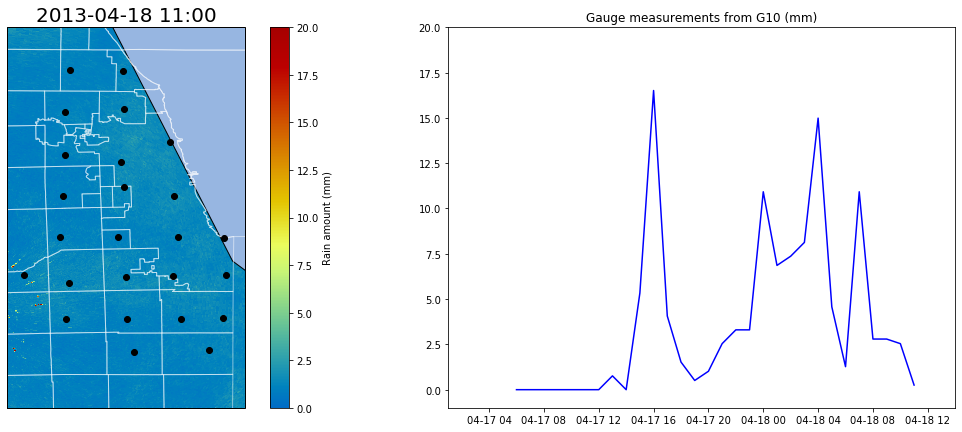

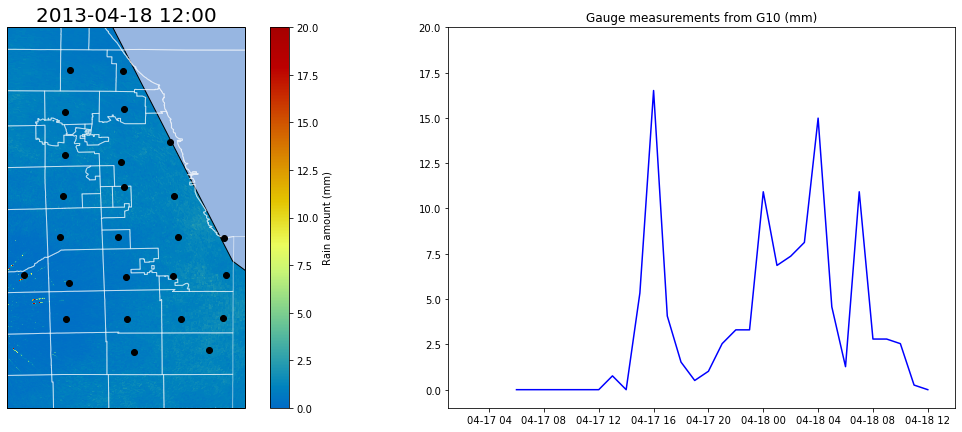

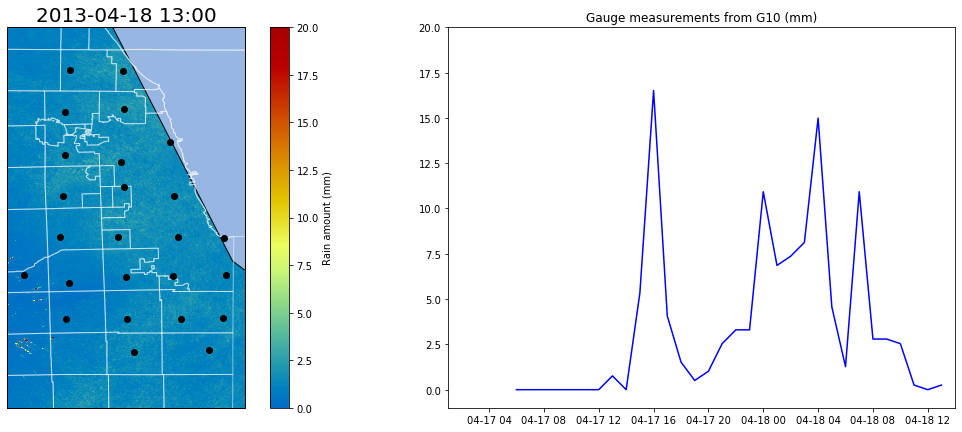

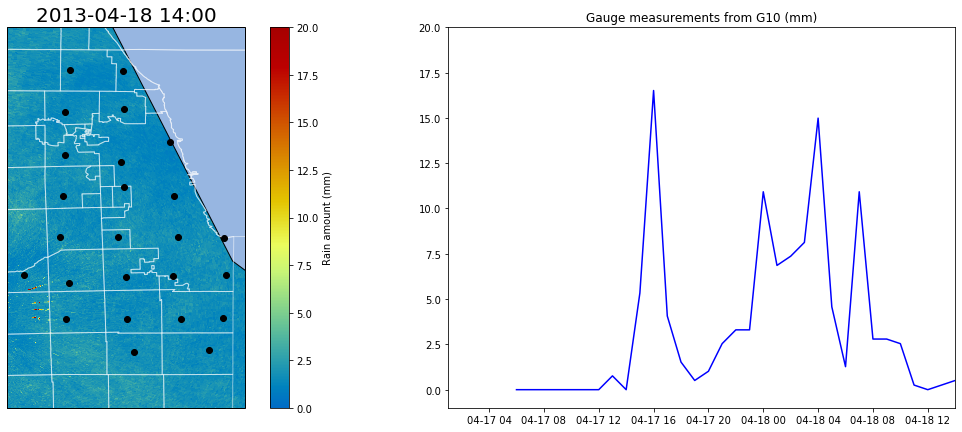

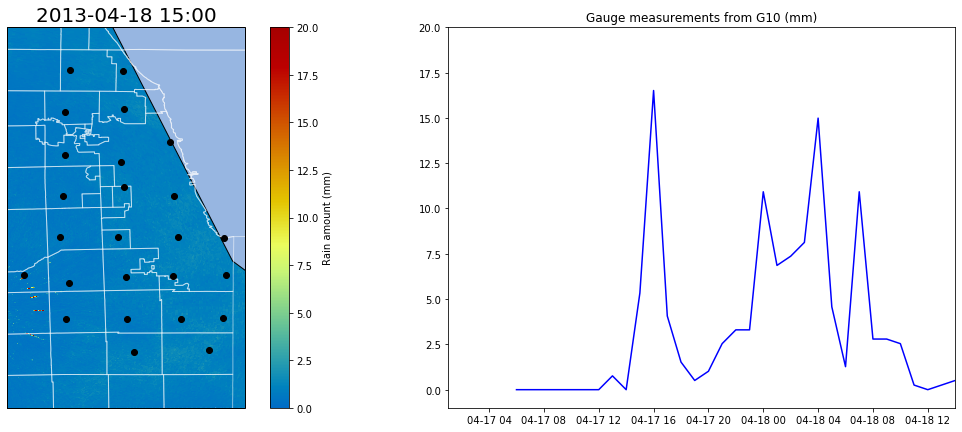

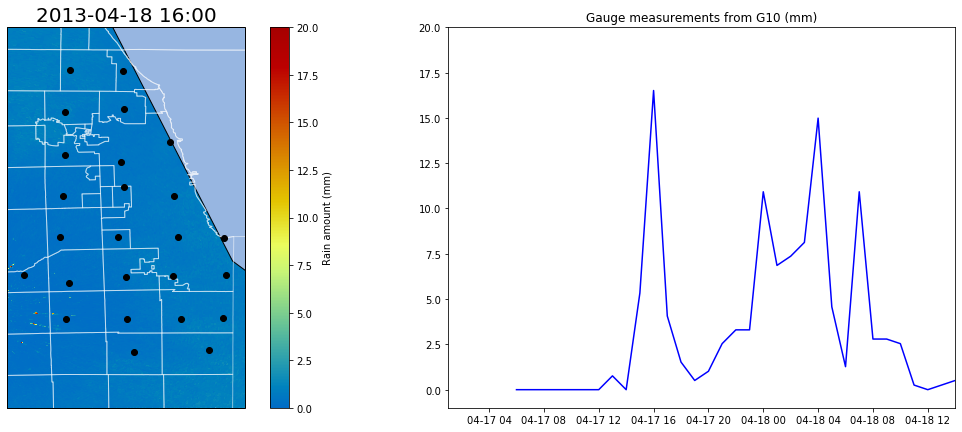

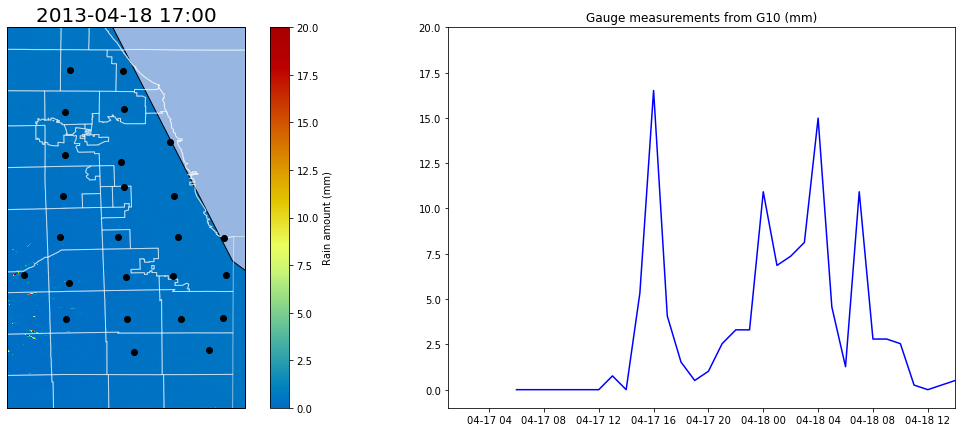

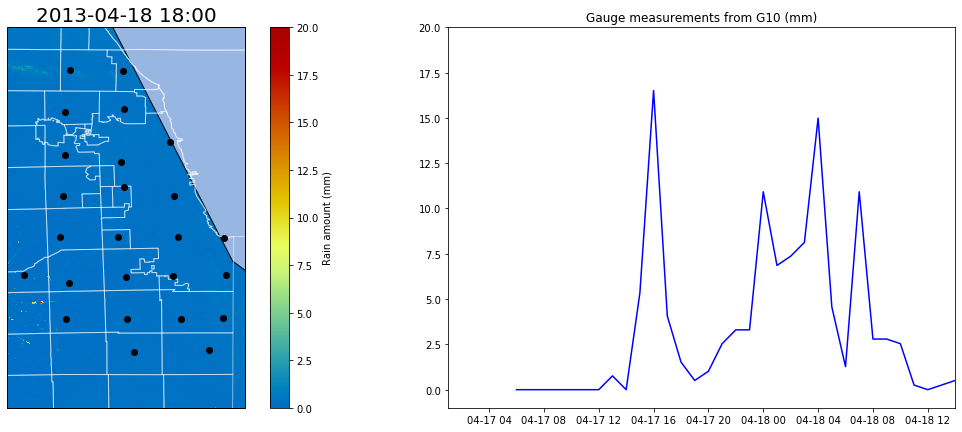

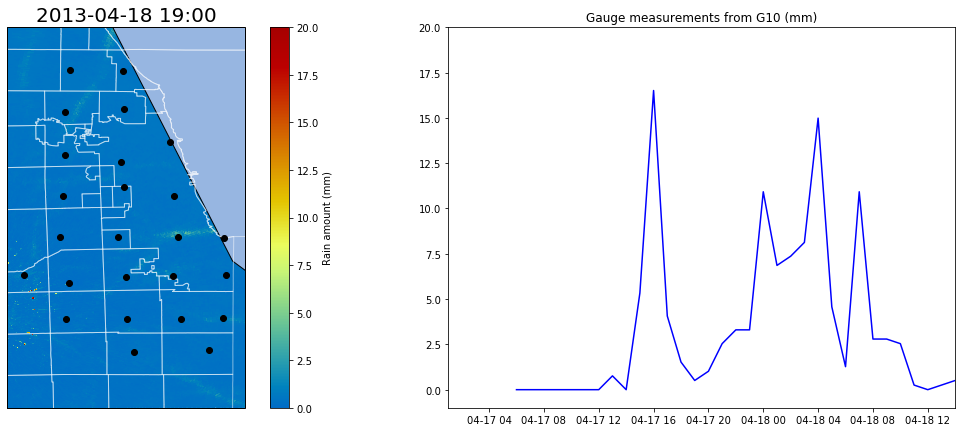

In [23]:
accum_total = np.zeros((720, 1832))
for accum_fname in accum_fname_list:
    accum_hour, attrs = wrl.io.from_hdf5(accum_fname)
    accum_total += accum_hour
    
    fname = accum_fname.rsplit('.',1)[0].strip('.hdf5')
    print(fname)
    dtime_utc = dt.datetime.strptime(fname,'KLOT%Y%m%d_%H%M%S')
    
    dtime_utc_aware = pytz.utc.localize(dtime_utc)
    dtime_local_aware = dtime_utc_aware.astimezone(timezone)
    
    timestr = dt.datetime.strftime(dtime_local_aware,'%Y-%m-%d %H:%M')
    savefname = dt.datetime.strftime(dtime_local_aware,'%Y%m%d_%H%M%S_Central.png')
    
    df_gauge_subset = df_gauge.loc[(df_gauge.Datetime >= tstart_local_aware) & (df_gauge.Datetime <= dtime_local_aware)]
    #print(len(df_gauge_subset))
#     fig = plt.figure(figsize=[12,7])
#     ax = plt.axes(projection=projection)
#     ax,pm = wrl.vis.plot_ppi(accum_hour, r=r, az=az, site=sitecoords,proj=projection, vmin=0, vmax=20, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,ax=ax)
#     plt.xlim(-88,-87.5)
#     plt.ylim(41.4,42.2)
#     cb = plt.colorbar(pm)
#     cb.set_label('Rain amount (mm)')
#     ax.add_feature(COUNTIES, facecolor='none', edgecolor='w', alpha=0.5)
#     ax.add_feature(cfeature.LAKES, zorder=.5, edgecolor='k')
#     plt.plot(x,y,'ko')
#     plt.title(timestr,fontsize=20)
#     plt.savefig(savefname, bbox_inches='tight')

    fig = plt.figure(figsize=[20,7])

    gridspec.GridSpec(1,3)

    #ax = plt.axes(projection=projection)
    ax = fig.add_subplot(121,projection=projection)
    ax,pm = wrl.vis.plot_ppi(accum_hour, r=r, az=az, site=sitecoords,proj=projection, vmin=0, vmax=20, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,ax=ax)
    plt.xlim(-88,-87.5)
    plt.ylim(41.4,42.2)
    cb = plt.colorbar(pm)
    cb.set_label('Rain amount (mm)')
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='w', alpha=0.5)
    ax.add_feature(cfeature.LAKES, zorder=.5, edgecolor='k')
    plt.plot(x,y,'ko')
    plt.title(timestr,fontsize=20)
    # plt.savefig(savefname, bbox_inches='tight')

    ax2 = fig.add_subplot(122)
    time = df_gauge_subset.index
    gaugevals = df_gauge_subset[gagenum].values*25.4 # convert inches to mm
    ax2.plot_date(time,gaugevals,'b-')
    ax2.set_xlim('2013-04-17 06:00:00','2013-04-18 19:00:00')
    ax2.set_ylim(-1,20)
    ax2.set_title('Gauge measurements from G10 (mm)')
    
    plt.savefig(savefname, bbox_inches='tight')

In [ ]:
accum_total = np.zeros((720, 1832))
for accum_fname in accum_fname_list:
    accum_hour, attrs = wrl.io.from_hdf5(accum_fname)
    accum_total += accum_hour
    
    fname = accum_fname.rsplit('.',1)[0].strip('.hdf5')
    print(fname)
    dtime_utc = dt.datetime.strptime(fname,'KLOT%Y%m%d_%H%M%S')
    
    dtime_utc_aware = pytz.utc.localize(dtime_utc)
    dtime_local_aware = dtime_utc_aware.astimezone(timezone)
    
    timestr = dt.datetime.strftime(dtime_local_aware,'%Y-%m-%d %H:%M')
    savefname = dt.datetime.strftime(dtime_local_aware,'%Y%m%d_%H%M%S_CST_radaronly.png')
    
    df_gauge_subset = df_gauge.loc[(df_gauge.Datetime >= tstart_local_aware) & (df_gauge.Datetime <= dtime_local_aware)]

    fig = plt.figure(figsize=[15,7])

    ax = fig.add_subplot(111,projection=projection)
    ax,pm = wrl.vis.plot_ppi(accum_hour, r=r, az=az, site=sitecoords,proj=projection, vmin=0, vmax=20, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,ax=ax)
    plt.xlim(-88,-87.5)
    plt.ylim(41.4,42.2)
    cb = plt.colorbar(pm)
    cb.set_label('Rain amount (mm)')
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='w', alpha=0.5)
    ax.add_feature(cfeature.LAKES, zorder=.5, edgecolor='k')
    plt.plot(x,y,'ko')
    plt.title(timestr,fontsize=20)

    plt.savefig(savefname, bbox_inches='tight')

KLOT20130417_110000
KLOT20130417_120000
KLOT20130417_130000
KLOT20130417_140000


In [24]:
# fig = plt.figure(figsize=[12,7])
# ax = plt.axes(projection=projection)
# #ax = fig.add_subplot(111)
# ax,pm = wrl.vis.plot_ppi(accum_total, r=r, az=az, site=sitecoords,proj=projection, vmin=0, vmax=120, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,ax=ax)
# plt.xlim(-90,-86)
# plt.ylim(40,43)
# plt.colorbar(pm)
# ax.add_feature(COUNTIES, facecolor='none', edgecolor='0.7')
# ax.add_feature(cfeature.LAKES, zorder=.5, edgecolor='k')

In [25]:
# fig = plt.figure(figsize=[12,7])
# ax = plt.axes(projection=projection)
# ax,pm = wrl.vis.plot_ppi(accum_total, r=r, az=az, site=sitecoords,proj=projection, vmin=0, vmax=100, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,ax=ax)
# plt.xlim(-88,-87.5)
# plt.ylim(41.4,42.2)
# plt.colorbar(pm)
# ax.add_feature(COUNTIES, facecolor='none', edgecolor='w', alpha=0.5)
# ax.add_feature(cfeature.LAKES, zorder=.5, edgecolor='k')
# plt.plot(x,y,'ko')